<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/Zonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


['Zonal_eco3_3.csv', 'Zonal_eco3_6.csv', 'Zonal_eco3_9.csv', 'Zonal_eco3_12.csv', 'Zonal_eco3_15.csv', 'Zonal_eco3_18.csv', 'Zonal_eco3_21.csv', 'Zonal_eco3_24.csv', 'Zonal_eco3_27.csv', 'Zonal_eco3_30.csv']


,LABEL,US_L3_13,US_L3_14,US_L3_18,US_L3_19,US_L3_20,US_L3_21,US_L3_22,US_L3_23,US_L3_24,US_L3_25,US_L3_26,US_L3_5,US_L3_79,US_L3_80,US_L3_81
0,1,271562,2746,2288,4445,60716,3540,88716,54570,28304,31112,88067,38,22462,29715,586
1,2,94154,71947,0,34,65374,22,101501,11804,71068,14609,10233,0,26534,368,123717
2,3,78933,1720,2247,61360,22490,36093,7837,89580,792,0,2915,1360,5268,31676,4


10
10


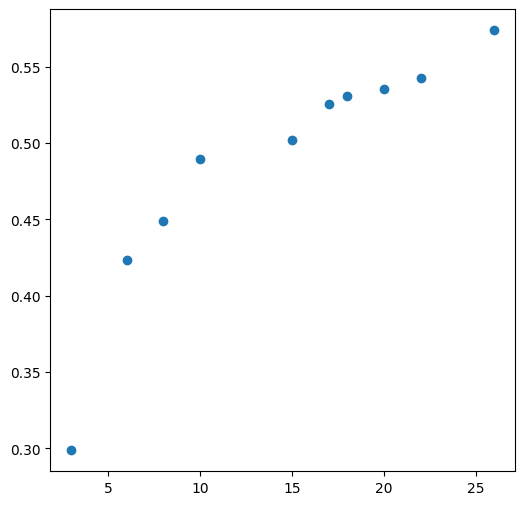

In [33]:
fld = '/content/drive/My Drive/Colab Notebooks/Analogs/Zonal_Test'

files = [f for f in os.listdir(fld) if f[-4:] == '.csv']
print(files)

df = pd.read_csv(os.path.join(fld, files[0]))
display(df)

df_dict = {}
for f in files:
  df = pd.read_csv(os.path.join(fld, f))
  n_classes = len(df)
  df_dict[n_classes] = df

keys = []
for key in df_dict:
  keys.append(key)

keys = sorted(keys)
sorted_dict = {}
for key in keys:
  sorted_dict[key] = df_dict[key]

purity_list = []
for key in sorted_dict:
  df = sorted_dict[key]
  sum = df.iloc[:, 1:].sum().sum()
  max_values_per_row = df.max(axis=1)
  purity = max_values_per_row.sum()/sum
  purity_list.append(purity)

fig, ax = plt.subplots(figsize=(6, 6))

print(len(keys))
print(len(purity_list))
ax.scatter(keys, purity_list)
